In [1]:
from scipy.stats import norm, normaltest, zscore
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import random
import numpy as np
import math
import pandas as pd

# 1. Normal Distributions in python

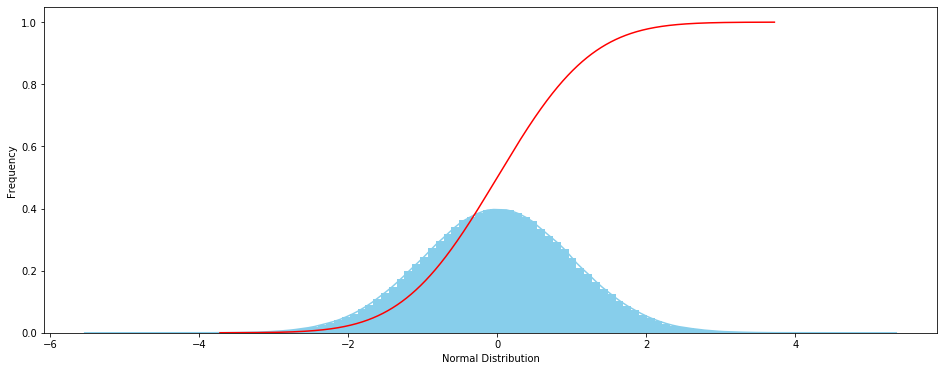

In [2]:
# generate a normal dist a.k.a. Gaussian, Bell
data_normal = norm.rvs(size=1000000,loc=0,scale=1)
# visualise cdf 
x = np.linspace(norm.ppf(0.0001),norm.ppf(0.9999), 10000)

plt.figure(figsize=(16, 6))
ax = sns.distplot(data_normal,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  label='Probability Distribution Function (pdf)',
                  hist_kws={"linewidth": 15,'alpha':1})
plt.plot(x,norm.cdf(x),color='red')
labels = ax.set(xlabel='Normal Distribution', ylabel='Frequency')

When we have a data sample that resembles a normal curve, we can make the assumption that our sample is drawn from a larger population which is normally distributed. This allows us to analyse our sample in the same we would a normal distribution. 

One of the most important properties of a normal curve is that we can state the proportion of the population that will lie between any two values along the curve.

> The standard deviation slices a bell curve into known proportions. One standard deviation from the mean will always take you to the 'point of inflection'. About 68% of all data will fall within this point. (34%) is each direction. 95% will fall within 2 standard devs.

We can check these percentages are correct by using the above distribution.

In [3]:
print(f'std = {data_normal.std()}')
print(f'mean = {data_normal.mean()}')

std = 0.9991787045140413
mean = -0.0006224870315482233


We can verify these preportions using the *Cumulative Distribution Function*. The below returns 0.5, as we would expect half the values to be lower than the mean (which here is 0), and the other half would be higher.

In [4]:
# Cumulative Distribution Function (cdf)
# returns the probability of a value less than or equal to a given outcome
norm.cdf(0)

0.5

<img src="media/normal.png" alt="Uniform" style="width: 400px;"/>

### **Q: Calculate the probability of drawing a value higher than 2 standard deviations from the mean using the cdf**

In [5]:
1 - norm.cdf(2*data_normal.std())

0.022838962815314612

### Stretch Q: Show the probability of measuring a value within one standard deviation of the mean using the cdf 

In [6]:
norm.cdf(data_normal.std()) - (1 - norm.cdf(data_normal.std()))

0.6822918699939291

Further information on these here: https://machinelearningmastery.com/continuous-probability-distributions-for-machine-learning/#:~:text=The%20probability%20of%20an%20event,or%20equal%20to%20a%20probability.

Key points:
> Normal Distributions are very frequently seen in the real world

> They can be characterised by two values: mean & standard deviation. This is all we need to generate a distribution.

> Standard deviation divides the Normal curve into known portions.


# 2. From Samples to Population

Often we talk of a distinction between *descriptive* and *inferential* statistics. The former deals with methods used to summarise and describe our observations. The latter attempts to draw predictions on future phenomena, based on patterns observed in the past.

This distinction depends crucially on another: the difference between *samples* and *populations*. 

* Population - *all* cases of the target attribute that exist
* Sample - a small selection of the wider population available for analysis

Let's create a fake sample of data. This could be anything that we have gone out to the world and measured from a normally distributed population. We will create a theoretical population, and then create our own small sample. 

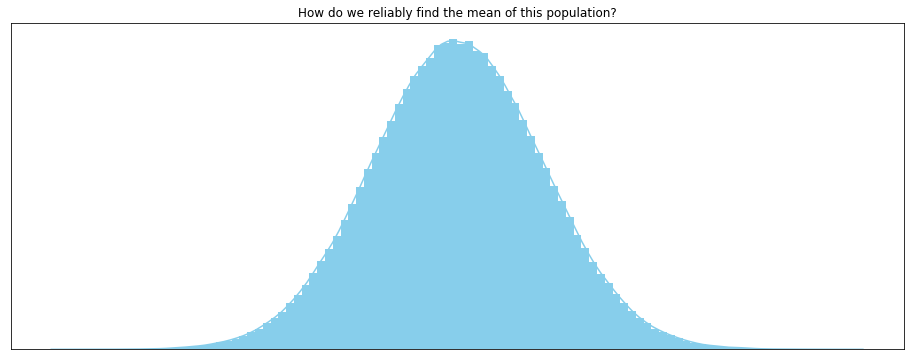

In [7]:
# Population of an unknown mean and variance
random.seed(54321)
pop_mean = np.random.uniform(0,1000)
pop_std = np.random.uniform(0,500)
pop = norm.rvs(size=1000000,
               loc=pop_mean,
               scale=pop_std)
plt.figure(figsize=(16, 6))
ax = sns.distplot(pop,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
labels = ax.set(xlabel='Value', ylabel='Frequency')
title = ax.set(title='How do we reliably find the mean of this population?')
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

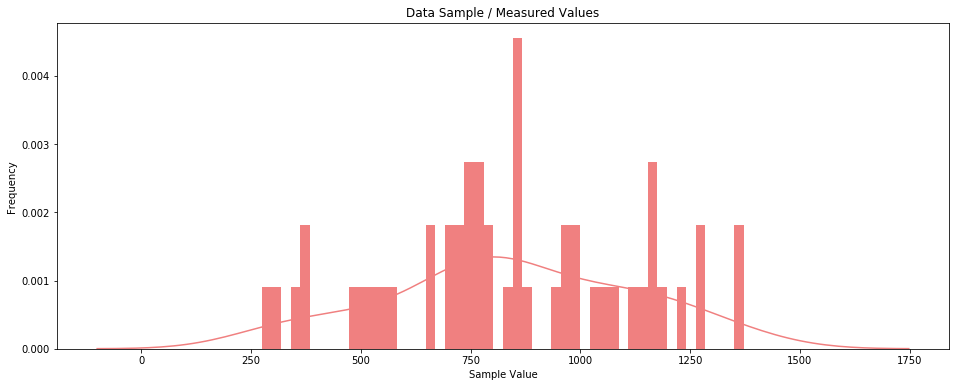

In [8]:
# sample size 
n = 50

# take a random sample 
sample = random.choice(pop,n)

plt.figure(figsize=(16, 6))
ax = sns.distplot(sample,
                  bins=50,
                  kde=True,
                  color='lightcoral',
                  hist_kws={"linewidth": 15,'alpha':1})
labels = ax.set(xlabel='Sample Value', ylabel='Frequency')
title = ax.set(title='Data Sample / Measured Values')

In [9]:
sample_mean = sample.mean()
sample_std = sample.std()
print(sample_mean)
print(sample_std)

842.7147371862295
278.6516133055585


Let's sense check the above. We can convert our data into z-units, or z-scores, allowing easier comparison to the Normal distribution.

> The **Z-score** is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.

## Q: Create calculate the z-scores for our sample

In [10]:
z = (sample - sample.mean())/sample.std()

# or 

z = zscore(sample)

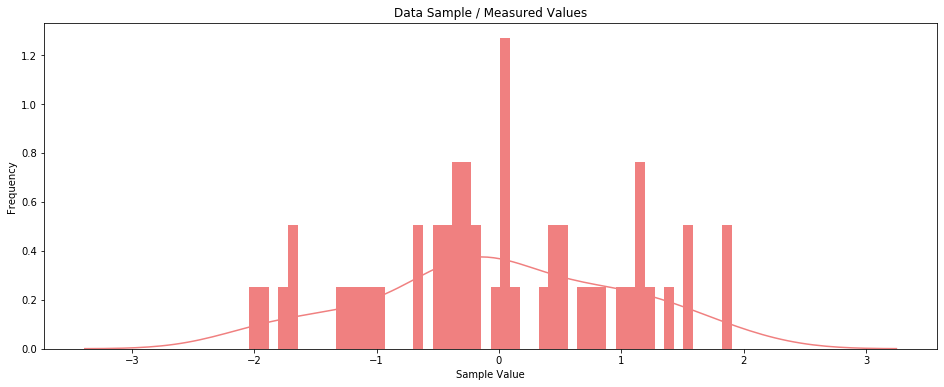

In [11]:
plt.figure(figsize=(16, 6))
ax = sns.distplot(z,
                  bins=50,
                  kde=True,
                  color='lightcoral',
                  hist_kws={"linewidth": 15,'alpha':1})
labels = ax.set(xlabel='Sample Value', ylabel='Frequency')
title = ax.set(title='Data Sample / Measured Values')

We can see our sample looks roughly(!) normal. If you are not convinced look how samples begin to resemble the population they are drawn from as the size of the sample increases. 

We have our summary statistics now, but we know this is not representative of the whole population. We are only working with a sample. How sure can we be in our measurements?

## **Q: How can we get an idea of the uncertainty in our measurement of the mean?**


We will resample! Looking at the variability in the different means we calculate can give us an idea of how uncertain we should be. 

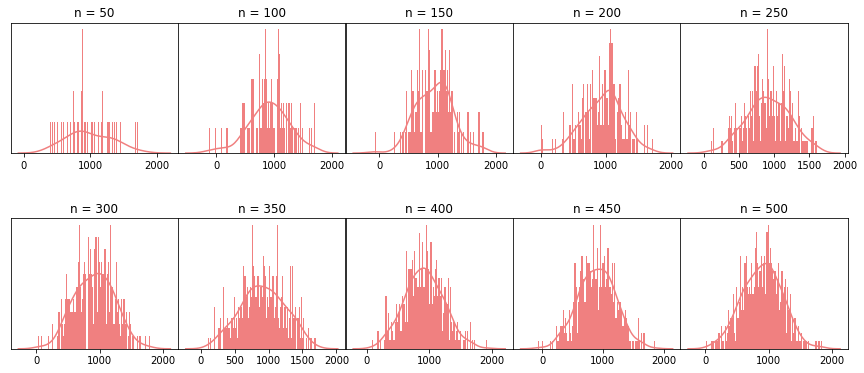

In [12]:
fig, axs = plt.subplots(2,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

for i in range(10):
    sample_size = 50 + (i*50)
    plot_sample = random.choice(pop,sample_size)
    sns.distplot(plot_sample,
                 ax = axs[i],
                 bins=100,
                 kde=True,
                 color='lightcoral',
                 hist_kws={"linewidth": 15,'alpha':1})
    
    axs[i].set_title(f'n = {sample_size}')
    # axs[i].axes.xaxis.set_visible(False)
    axs[i].axes.yaxis.set_visible(False)

## **Q: Build a data set from our population 'pop'**

In [13]:
means = []
for i in range (0,100):
    new_sample = random.choice(pop,100)
    means.append(new_sample.mean())

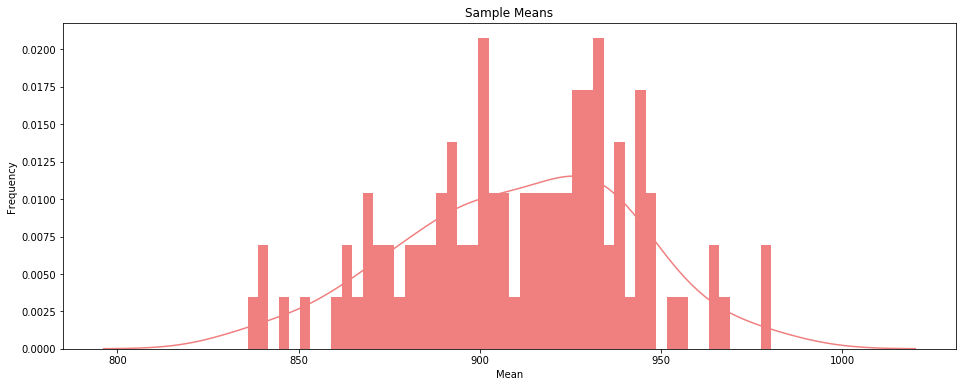

In [14]:
plt.figure(figsize=(16, 6))
ax = sns.distplot(means,
                  bins=50,
                  kde=True,
                  color='lightcoral',
                  hist_kws={"linewidth": 15,'alpha':1})
labels = ax.set(xlabel='Mean', ylabel='Frequency')
title = ax.set(title='Sample Means')

> This is an example of a **Sampling Distribution** of the Mean

Crucially, this distribution of means is **normally** distributed. Using what we covered in exercise one, we can now provide some uncertainty to our estimate of the mean. If you're not convinced the above is normally distributed, fiddle with the sample size and number of samples taken.

Before we do so:

## Q: How will the mean and standard deviation of our Sampling Distribution compare with that of the Population? Why?

The means should be the same. The standard deviation of our samples should be less - we would not expect to see as much variation between samples means as between the wider population. Extreme values are not likely to repeatedly come up during sampling. 

Lets see:

In [15]:
means_mean = np.array(means).mean()
means_std = np.array(means).std()

print(pop_mean, means_mean)
print(pop_std, means_std)

911.6407819816541 910.7628974297752
311.9124180948525 31.22293531606149


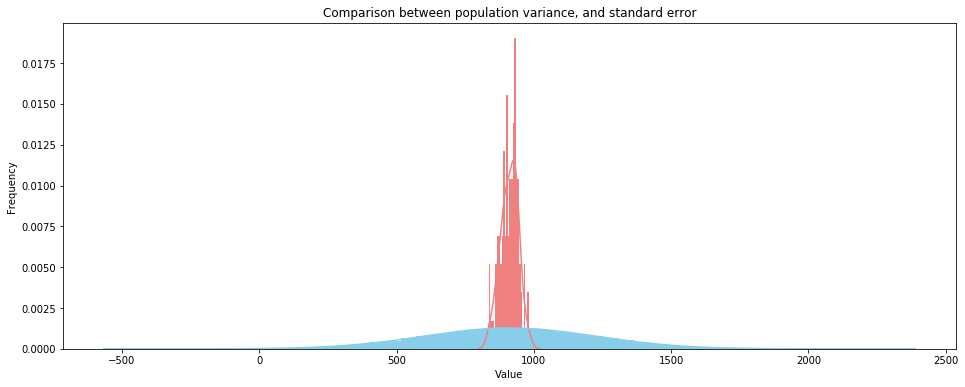

In [16]:
plt.figure(figsize=(16, 6))
ax = sns.distplot(np.array(means),
                  bins=25,
                  kde=True,
                  color='lightcoral',
                  hist_kws={"linewidth": 15,'alpha':1})
ax = sns.distplot(pop,
                  bins=50,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
labels = ax.set(xlabel='Value', ylabel='Frequency')
title = ax.set(title='Comparison between population variance, and standard error')

## Q: How can we use the standard deviation of our sampling distribution to provide an uncertainty on our mean value?

In [17]:
print(means_mean)
print(means_std)

910.7628974297752
31.22293531606149


In [18]:
print(f'We can be 68% the means falls within {means_mean} ± {means_std}')

We can be 68% the means falls within 910.7628974297752 ± 31.22293531606149


This means that 68% of the time, our mean will fall within one standard deviation from the population mean. This standard deviation is known as the Standard Error.

> The **Standard Error** is the standard deviation of a sampling distribution of means. It quantifies how precisely we know the true population mean.

> $SE = \frac{\sigma}{\sqrt(n)}$

Using this formula means we do *not* have to repeatedly draw samples but can instead estimate it from a single sample.

## Q: Create a function to calculate the SE for a single sample

In [19]:
def calc_SE(data):
    return data.std()/(math.sqrt(len(data)))

print(calc_SE(sample))

39.4072890713864


Not perfect, but for just using one sample - it came pretty close. 

## Q: Why is our value not in agreement with above? How could we change that?

Increase N. From the formula you can see it plays an important role in reducing our error.

## Q: If we wanted to be 100% (or near enough) in our estimate of population mean, how many SEs would we use?

In [20]:
print(f'Population mean = {sample.mean()} ± {3*calc_SE(sample)}')

Population mean = 842.7147371862295 ± 118.2218672141592


> Our range covers 99.7% of values. This is our **Confidence interval**.

> *It is the probability that a population parameter will fall between a set of values for a certain proportion of times*

> Two of the most commonly used confidence intervals are 95% and 99%.

c.f. true value:

In [21]:
pop_mean

911.6407819816541

# 3. Hypothesis Testing

Lets now use what we know to create our own hypothesis test. Our question: On average, are London Air BnBs priced differently depending on whether they are North or South of the Thames? 

In [49]:
df = pd.read_csv('air.csv')
df.shape

(76216, 16)

We will look at a subset, otherwise it is too easy! Let's pretend we only have a small sample of the data.

In [50]:
df = df.sample(100)

In [51]:
north = np.array(df[df['region'] == 'North']['price'])
south = np.array(df[df['region'] == 'South']['price'])

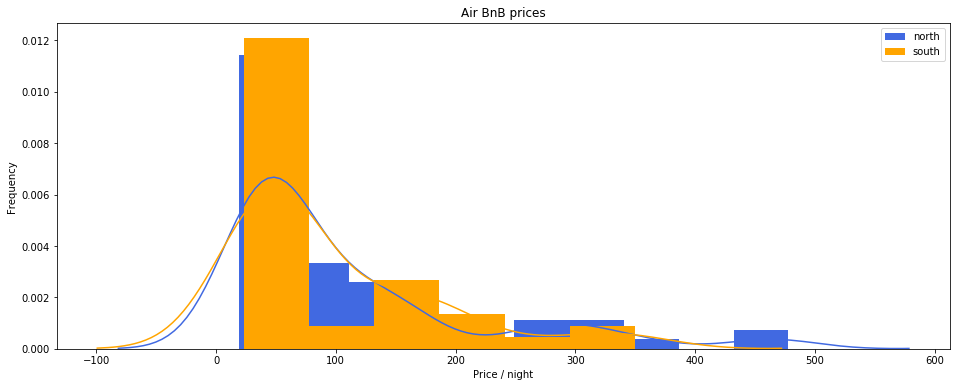

In [52]:
plt.figure(figsize=(16, 6))
ax = sns.distplot(north,
                  kde=True,
                  label='north',
                  color='royalblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax = sns.distplot(south,
                  label='south',
                  kde=True,
                  color='orange',
                  hist_kws={"linewidth": 15,'alpha':1})
labels = ax.set(xlabel='Price / night', ylabel='Frequency')
title = ax.set(title='Air BnB prices')
ax.legend()
plt.show()

## Q: We can be 95% sure that...

In [53]:
print(f'Population mean for North London = {north.mean()} ± {2*calc_SE(north)}')
print(f'Population mean for South London = {south.mean()} ± {2*calc_SE(south)}')

Population mean for North London = 109.72881355932203 ± 28.077859103022647
Population mean for South London = 97.29268292682927 ± 26.188103152194913


We now have the necessary information from both samples to create a distribution of means for both. 

In [54]:
print(north.mean(),calc_SE(north))
print(south.mean(),calc_SE(south))

109.72881355932203 14.038929551511323
97.29268292682927 13.094051576097456


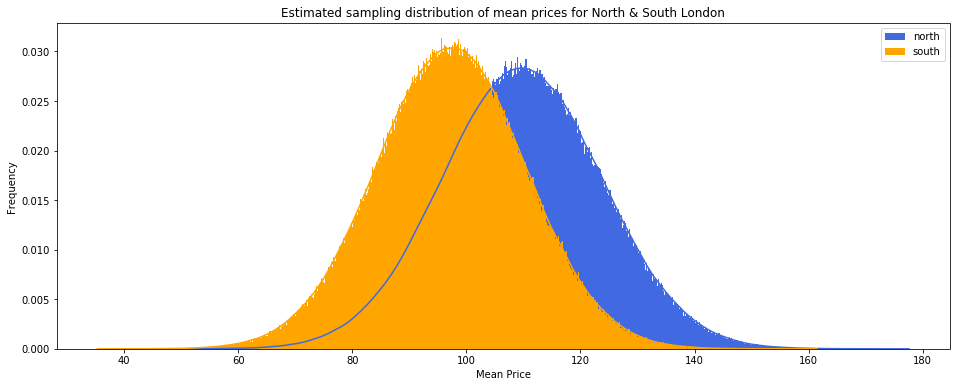

In [55]:
north_means = norm.rvs(size=1000000,
                       loc=north.mean(),
                       scale=calc_SE(north))
south_means = norm.rvs(size=1000000,
                       loc=south.mean(),
                       scale=calc_SE(south))

plt.figure(figsize=(16, 6))
ax = sns.distplot(north_means,
                  bins=1000,
                  label='north',
                  kde=True,
                  color='royalblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax = sns.distplot(south_means,
                  bins=1000,
                  label='south',
                  kde=True,
                  color='orange',
                  hist_kws={"linewidth": 15,'alpha':1})
labels = ax.set(xlabel='Mean Price', ylabel='Frequency')
title = ax.set(title='Estimated sampling distribution of mean prices for North & South London')
leg = ax.legend()

Note the change in overlap! Our two sets of data, which initially looked the same, now show major differences. While many properties in South London may be more expensive than in North London, 'rarely' (depends on what you see above) will a *sample* of properties in the South have a higher mean than in the North.

In [56]:
# note this value for later
np.abs(south_means.mean() - north_means.mean())

12.464896449020287

# Try to guess what we will now do to know if this difference in sample means is statistically significant

We will create *another* distribution! A distribution of differences. We are asking: how often will a North sample have a mean higher than a South sample, how often will a South sample have a higher mean than a North sample and how often will they be the same?

In [57]:
mean_differences = north_means - south_means

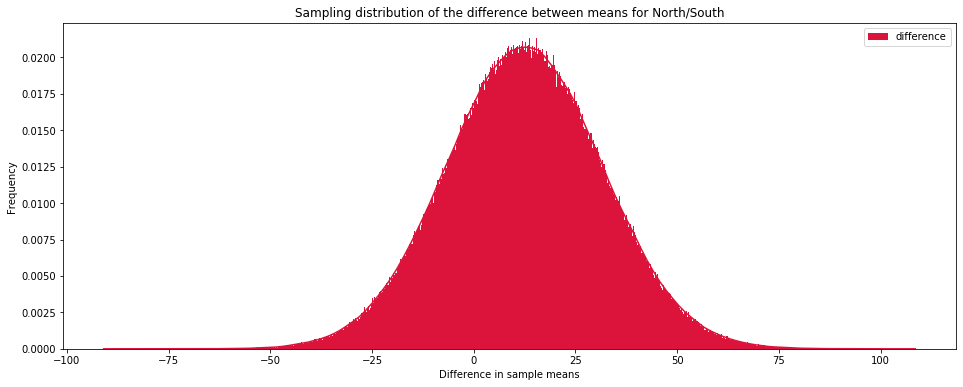

In [58]:
plt.figure(figsize=(16, 6))
ax = sns.distplot(mean_differences,
                  bins=1000,
                  label='difference',
                  kde=True,
                  color='crimson',
                  hist_kws={"linewidth": 15,'alpha':1})

labels = ax.set(xlabel='Difference in sample means', ylabel='Frequency')
title = ax.set(title='Sampling distribution of the difference between means for North/South')
leg = ax.legend()

> As with the distribution of means, the standard deviation here is known as the standard error. 

>In this case, as the *Standard Error of the differences between means* (SE-Diff)

> We can estimate this using: SE-Diff = $\sqrt{\sigma_{a}^{2}+\sigma_{b}^{2}}.$

## Q: Create a function to calculate SE-Diff

In [59]:
def calc_SE_Diff(sig_a,sig_b):
    return math.sqrt((sig_a**2)+(sig_b**2))

As before, all the usual proportions that relate to normal curves apply. E.g., 68% of values can be expected to fall within  $\pm\sigma$ of the mean value.

Now we are armed with some tools to make our final judgement. But first, everyone's favorite bit. Let's be cautious and following convention, assume our samples actually $do$ come from the same sample. In other words:

> Null hypothesis: There is no real difference between rental prices in North/South London. They belong to the same population. 

> Alternate hypothesis: This *is* a difference between rental prices in North/South London.

As always, we assume the Null is correct. Let's then look at what we would expect the above distribution to look like, should that be case. If the variation we observe is too much to realistically accept - we can accept the alternate hypothesis.

## Q: What would we expect to see in this distribution of differences for two samples drawn from the *same* population?

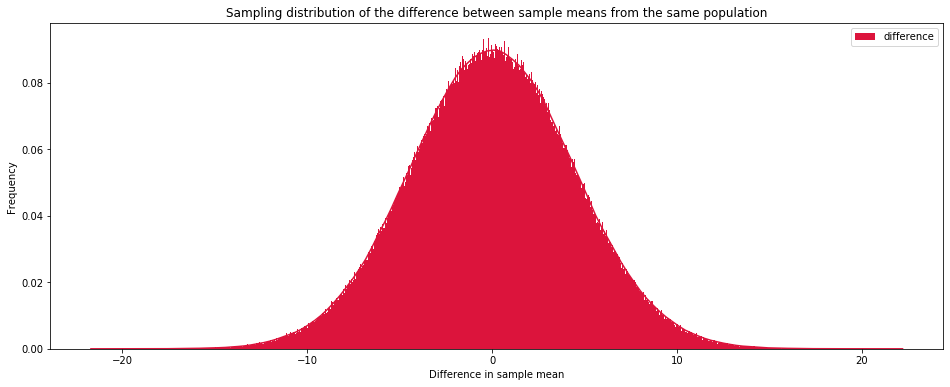

In [60]:
# Create two sampling distributions from the same population
n = 10000
sample1 = random.choice(pop,n)

sample1_means = norm.rvs(size=1000000,
                       loc=sample1.mean(),
                       scale=calc_SE(sample1))
sample2_means = norm.rvs(size=1000000,
                       loc=sample1.mean(),
                       scale=calc_SE(sample1))

# Plot the differences
plt.figure(figsize=(16, 6))
ax = sns.distplot(sample1_means-sample2_means,
                  bins=1000,
                  label='difference',
                  kde=True,
                  color='crimson',
                  hist_kws={"linewidth": 15,'alpha':1})

labels = ax.set(xlabel='Difference in sample mean', ylabel='Frequency')
title = ax.set(title='Sampling distribution of the difference between sample means from the same population')
leg = ax.legend()

We would expect our distribution to be centred on 0! However, even samples drawn from the same population will create some variation

In [61]:
print(f'If our samples were from the same population...')
print(f'\n Their means would differ by ±{calc_SE_Diff(calc_SE(sample1),calc_SE(sample1))} 68% percent of the time.')
print(f'\n Their means would differ by ±{2*calc_SE_Diff(calc_SE(sample1),calc_SE(sample1))} 95% percent of the time.')
print(f'\n Their means would differ by ±{3*calc_SE_Diff(calc_SE(sample1),calc_SE(sample1))} 99% percent of the time.')

If our samples were from the same population...

 Their means would differ by ±4.414781288516715 68% percent of the time.

 Their means would differ by ±8.82956257703343 95% percent of the time.

 Their means would differ by ±13.244343865550146 99% percent of the time.


Lets now compare or Air BnB data with what we would expect to see if there was no difference. I.e. mean = 0 

In [62]:
mean_differences.sort()

In [63]:
mean_differences

array([-87.10414902, -81.2879542 , -78.63617982, ...,  95.90132525,
        98.07322679, 104.6718427 ])

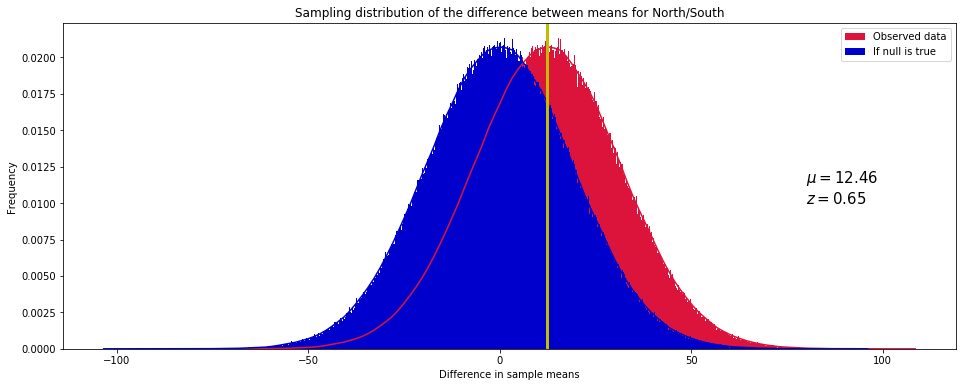

In [64]:
plt.figure(figsize=(16, 6))
ax = sns.distplot(mean_differences,
                  bins=1000,
                  label='Observed data',
                  kde=True,
                  color='crimson',
                  hist_kws={"linewidth": 15,'alpha':1})
null_dist = mean_differences-mean_differences.mean()
ax = sns.distplot(null_dist,
                  bins=1000,
                  label='If null is true',
                  kde=True,
                  color='mediumblue',
                  hist_kws={"linewidth": 15,'alpha':1})

ax.text(80, 0.010,
        f'$\mu = {np.around(mean_differences.mean(),2)}$ \n$z={np.around(((mean_differences.mean() - null_dist.mean())/null_dist.std()),2)}$',
        fontsize=15)
plt.axvline(x=mean_differences.mean(), ymin=0,ymax=1,color='y',linewidth=3)
labels = ax.set(xlabel='Difference in sample means', ylabel='Frequency')
title = ax.set(title='Sampling distribution of the difference between means for North/South')
leg = ax.legend()

In [65]:
print(f'If our samples were from the same population...')
print(f'\n Their means would differ by ±{calc_SE_Diff(calc_SE(north),calc_SE(south))} 68% percent of the time.')
print(f'\n Their means would differ by ±{2*calc_SE_Diff(calc_SE(north),calc_SE(south))} 95% percent of the time. (p=0.05)')
print(f'\n Their means would differ by ±{3*calc_SE_Diff(calc_SE(north),calc_SE(south))} 99% percent of the time. (p=0.1)')

If our samples were from the same population...

 Their means would differ by ±19.19754488547424 68% percent of the time.

 Their means would differ by ±38.39508977094848 95% percent of the time. (p=0.05)

 Their means would differ by ±57.59263465642272 99% percent of the time. (p=0.1)


In [66]:
print(f'Here, our most common difference in sample means is {mean_differences.mean()}')

Here, our most common difference in sample means is 12.46489644902026


In [67]:
z = (mean_differences.mean() - null_dist.mean())/null_dist.std()
z

0.6492595477202645

As in exercise 1, we can calculate the probability of achieving a result like this. We want to know what the probabilty is of achieving a result this far away from the mean, assuming our two samples come from the same population. 

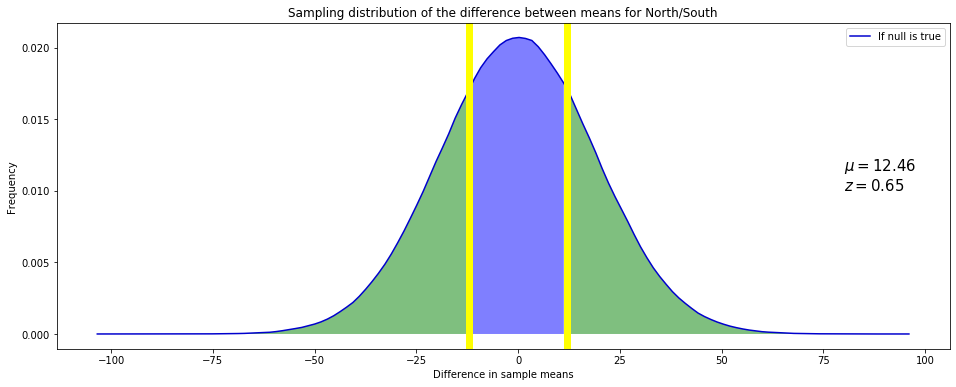

In [68]:
plt.figure(figsize=(16, 6))
ax = sns.kdeplot(null_dist,
                  label='If null is true',
                  color='mediumblue')

ax.text(80, 0.010,
        f'$\mu = {np.around(mean_differences.mean(),2)}$ \n$z={np.around(((mean_differences.mean() - null_dist.mean())/null_dist.std()),2)}$',
        fontsize=15)
plt.axvline(x=int(mean_differences.mean()), ymin=0,ymax=1,color='yellow',linewidth=7)
plt.axvline(x=-int(mean_differences.mean()), ymin=0,ymax=1,color='yellow',linewidth=7)
labels = ax.set(xlabel='Difference in sample means', ylabel='Frequency')
title = ax.set(title='Sampling distribution of the difference between means for North/South')
leg = ax.legend()
line = ax.get_lines()[0]
x, y = line.get_data()
mask1 = x >= (mean_differences.mean()) - 0.25
mask2 =  ((-mean_differences.mean()) - 0.3 < x) &  (x < (mean_differences.mean()))
mask3 = x <= int(-mean_differences.mean())
ax.fill_between(x[mask1], y1=y[mask1], alpha=0.5, facecolor='green')
ax.fill_between(x[mask2], y1=y[mask2], alpha=0.5, facecolor='blue')
ax.fill_between(x[mask3], y1=y[mask3], alpha=0.5, facecolor='green')
plt.show()




<img src="media/normal.png" alt="Uniform" style="width: 400px;"/>

Let's switch to z-units

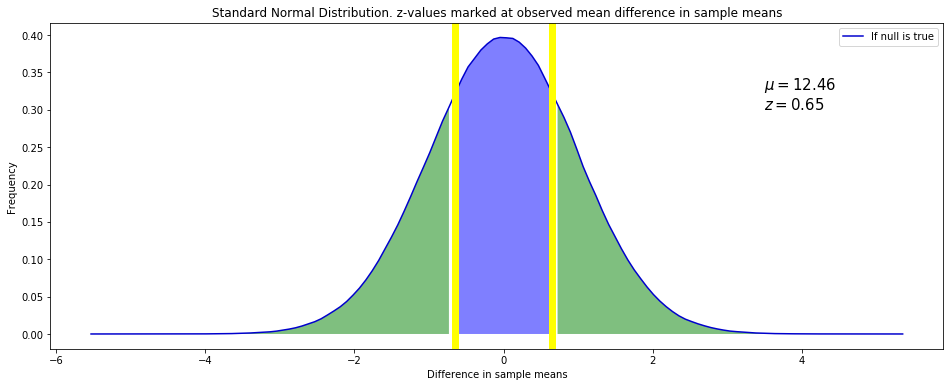

In [69]:
plt.figure(figsize=(16, 6))
ax = sns.kdeplot(data_normal,
                  label='If null is true',
                  color='mediumblue')

ax.text(3.5, 0.30,
        f'$\mu = {np.around(mean_differences.mean(),2)}$ \n$z={np.around(((mean_differences.mean() - null_dist.mean())/null_dist.std()),2)}$',
        fontsize=15)
plt.axvline(x=z, ymin=0,ymax=1,color='yellow',linewidth=7)
plt.axvline(x=-z, ymin=0,ymax=1,color='yellow',linewidth=7)
labels = ax.set(xlabel='Difference in sample means', ylabel='Frequency')
title = ax.set(title='Standard Normal Distribution. z-values marked at observed mean difference in sample means')
leg = ax.legend()
line = ax.get_lines()[0]
x, y = line.get_data()
mask1 = x >= (z) 
mask2 =  (-z  < x) &  (x < (z))
mask3 = x <= (-z)
ax.fill_between(x[mask1], y1=y[mask1], alpha=0.5, facecolor='green')
ax.fill_between(x[mask2], y1=y[mask2], alpha=0.5, facecolor='blue')
ax.fill_between(x[mask3], y1=y[mask3], alpha=0.5, facecolor='green')

plt.show()

In [70]:
p = (1- norm.cdf(z)) * 2
p

0.5161706279258391

This is the chance of observing such a difference from the mean by considering sampling error. Depending on whether we working at the 95 (p=0.05) or 99 (p=0.01) signficance level, we could either reject or accept the alternate hypothesis.

There is a x% chance this difference would be observed by chance, should these two samples have been from the same population.

Let's say we chose p=0.05 as our significance level. We would accept our alternate hypothesis if our observed difference fell in the shaded areas.

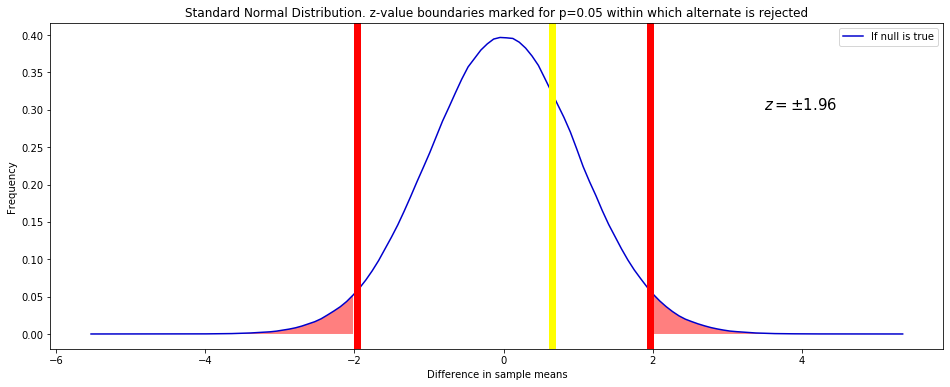

In [84]:
# this gives us the z-value for a given percentageo the cdf
p = 0.05
boundary_005 = norm.ppf(p/2)

plt.figure(figsize=(16, 6))
ax = sns.kdeplot(data_normal,
                  label='If null is true',
                  color='mediumblue')

ax.text(3.5, 0.30,
        f'$z=±{np.abs(np.around(boundary_005,2))}$',
        fontsize=15)
plt.axvline(x=z, ymin=0,ymax=1,color='yellow',linewidth=7)
plt.axvline(x=boundary_005, ymin=0,ymax=1,color='red',linewidth=7)
plt.axvline(x=-boundary_005, ymin=0,ymax=1,color='red',linewidth=7)
labels = ax.set(xlabel='Difference in sample means', ylabel='Frequency')
title = ax.set(title='Standard Normal Distribution. z-value boundaries marked for p=0.05 within which alternate is rejected')
leg = ax.legend()
line = ax.get_lines()[0]
x, y = line.get_data()
mask1 = x >= (-boundary_005) 
mask3 = x <= (boundary_005)
ax.fill_between(x[mask1], y1=y[mask1], alpha=0.5, facecolor='red')
ax.fill_between(x[mask3], y1=y[mask3], alpha=0.5, facecolor='red')

plt.show()

Note that our observered z-value lies within this boundary. Therefore, we have not met the threshold of the 95% confidence level. We cannot be confident that this observered result did not just happen by chance. Note that the scipy test agrees with our above own p-value (percentage chance of overserving) calculated above. 

In [83]:
from scipy.stats import ttest_ind
ttest_ind(south, north)

Ttest_indResult(statistic=-0.6134400006925675, pvalue=0.5410066443306312)

Fore refrence, here is what the 'target' areas we would want to see our z-value fall in for the 99% significance level. 

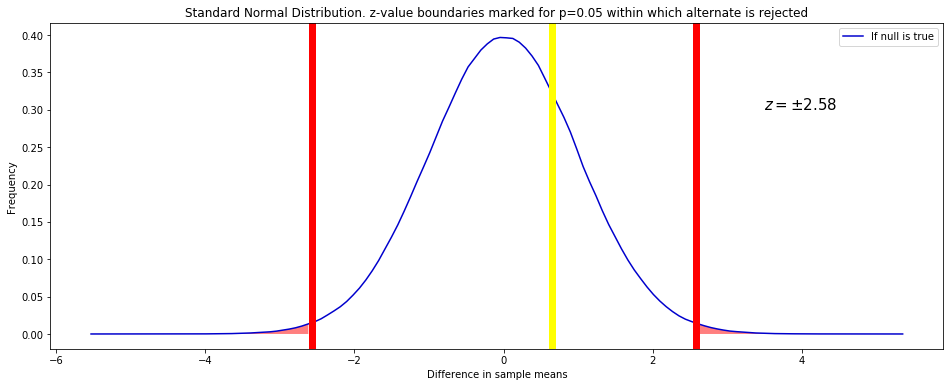

In [87]:
# this gives us the z-value for a given percentageo the cdf
p = 0.01
boundary_005 = norm.ppf(p/2)

plt.figure(figsize=(16, 6))
ax = sns.kdeplot(data_normal,
                  label='If null is true',
                  color='mediumblue')

ax.text(3.5, 0.30,
        f'$z=±{np.abs(np.around(boundary_005,2))}$',
        fontsize=15)
plt.axvline(x=z, ymin=0,ymax=1,color='yellow',linewidth=7)
plt.axvline(x=boundary_005, ymin=0,ymax=1,color='red',linewidth=7)
plt.axvline(x=-boundary_005, ymin=0,ymax=1,color='red',linewidth=7)
labels = ax.set(xlabel='Difference in sample means', ylabel='Frequency')
title = ax.set(title='Standard Normal Distribution. z-value boundaries marked for p=0.05 within which alternate is rejected')
leg = ax.legend()
line = ax.get_lines()[0]
x, y = line.get_data()
mask1 = x >= (-boundary_005) 
mask3 = x <= (boundary_005)
ax.fill_between(x[mask1], y1=y[mask1], alpha=0.5, facecolor='red')
ax.fill_between(x[mask3], y1=y[mask3], alpha=0.5, facecolor='red')

plt.show()

Caveats - the dispersion for North/South is are not too similiar. These should really be the same for the above to be used.

# Two-tailed / One-tailed z-tests

Suppose we were more sprecific with our question:

> Null hypothesis: There is no real difference between rental prices in North/South London. They belong to the same population. 

> Alternate hypothesis: Rental prices in North London are higher on average then in South London.

This more specific alternate hypothesis has turned this into a *one tail* statistical test.

Make sure we subtract North from South. We will then know we would expect only a *postitive* z-value if our alternate is to be accepted.

Notice above we divided our signficance level (0.05,0.01) by 2 in order to visualise the areas our z-value would have to fall into in order to convince us of the alternate's validity. This is becuase we previously did not state if this value should be positive or negative. We only requested that the overall probability of finding such a result is equal to 5% or 1%. 

In two tailed tests we split this probability in half, and keep our eyes open on both sides of the curve. In one tailed tests we do not need to do this. Let's look at all the graphs below:



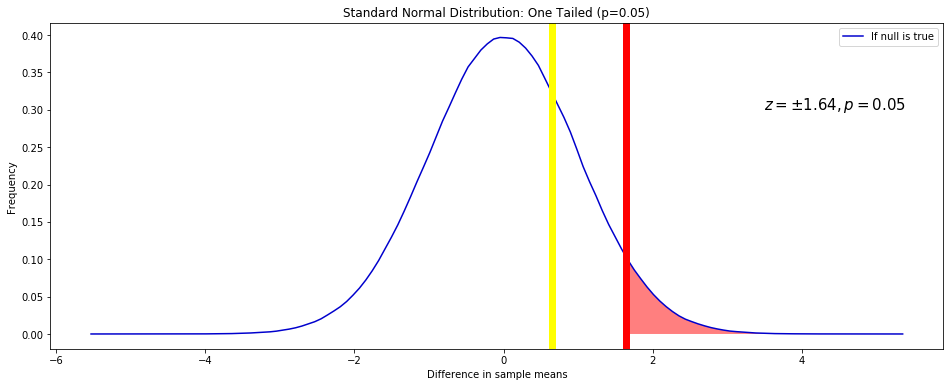

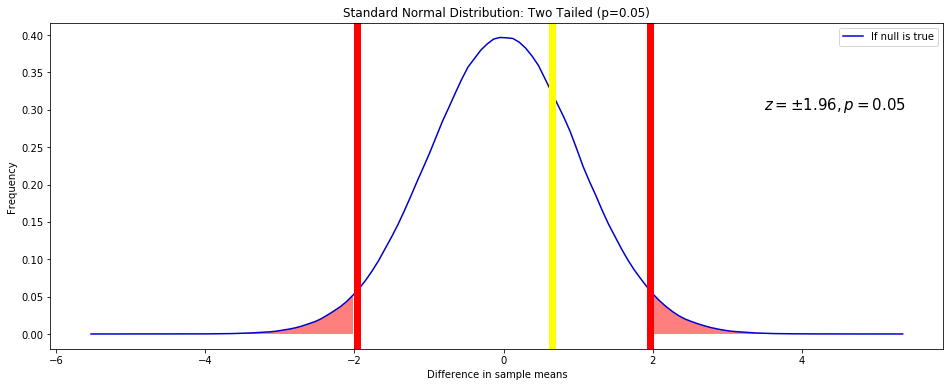

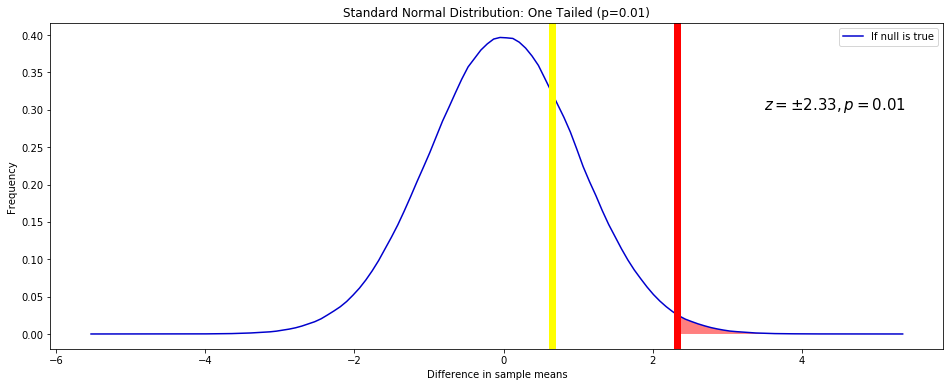

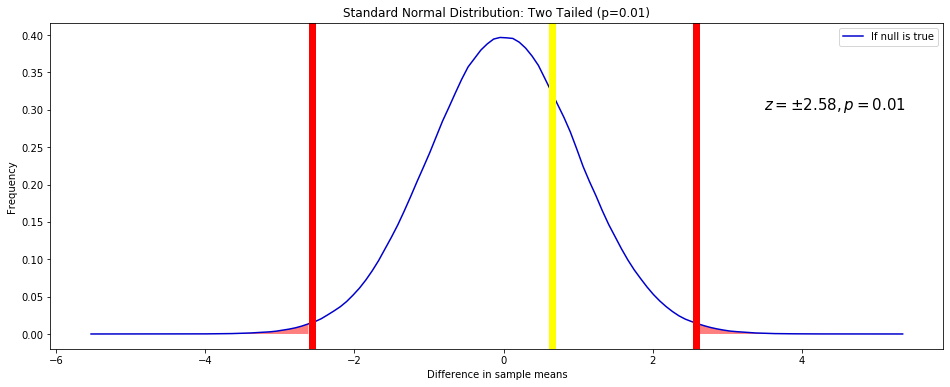

In [106]:
# this gives us the z-value for a given percentageo the cdf
for p in [0.05,0.01]:
    for test in ['One Tailed','Two Tailed']:
    
        
        if test == 'Two Tailed':
            boundary = norm.ppf(p/2)
        else:
            boundary = norm.ppf(p)

        plt.figure(figsize=(16, 6))
        ax = sns.kdeplot(data_normal,
                          label='If null is true',
                          color='mediumblue')

        ax.text(3.5, 0.30,
                f'$z=±{np.abs(np.around(boundary,2))}, p={p} $ ',
                fontsize=15)

        labels = ax.set(xlabel='Difference in sample means', ylabel='Frequency')
        title = ax.set(title=f'Standard Normal Distribution: {test} (p={p})')
        leg = ax.legend()
        line = ax.get_lines()[0]
        x, y = line.get_data()
        
        if test == 'Two Tailed':
            mask1 = x >= (-boundary) 
            mask3 = x <= (boundary)
            ax.fill_between(x[mask1], y1=y[mask1], alpha=0.5, facecolor='red')
            ax.fill_between(x[mask3], y1=y[mask3], alpha=0.5, facecolor='red')
            plt.axvline(x=z, ymin=0,ymax=1,color='yellow',linewidth=7)
            plt.axvline(x=boundary, ymin=0,ymax=1,color='red',linewidth=7)
            plt.axvline(x=-boundary, ymin=0,ymax=1,color='red',linewidth=7)
        
        else:
            mask2 = x >= np.abs(boundary)
            ax.fill_between(x[mask2], y1=y[mask2], alpha=0.5, facecolor='red')
            plt.axvline(x=z, ymin=0,ymax=1,color='yellow',linewidth=7)
            plt.axvline(x=np.abs(boundary), ymin=0,ymax=1,color='red',linewidth=7)

        plt.show()

Final comparison!

In [118]:
print(f'Two Tailed Test: p={(1- norm.cdf(z)) * 2}')

# proportion of differences we would expect to see that meet or exceed this difference, if the null were true
print(f'One Tailed Test: p={(1- norm.cdf(z))}')

Two Tailed Test: p=0.5161706279258391
One Tailed Test: p=0.25808531396291956


In [121]:
print(f'Scipy implementation Two Tailed: {ttest_ind(south, north).pvalue}')
print(f'Scipy implementation Two Tailed: {(ttest_ind(south, north).pvalue)/2}')

Scipy implementation Two Tailed: 0.5410066443306312
Scipy implementation Two Tailed: 0.2705033221653156
